In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA,PLSCanonical, PLSRegression
import matplotlib.pyplot as plt

读入体验和其他相关特征，统计周期一个星期。该数据由王凯提供。

In [3]:
driver_exp_0 = pd.read_csv('driver_exp_features_1_15.csv')
driver_exp_1 = pd.read_csv('driver_exp_features_16_70.csv')
driver_exp_2 = pd.read_csv('driver_exp_features_70PLUS.csv')

读入李盼的收入相关数据。该数据可以分为与特征同期和特征后一个星期。这里暂时使用特征后一个星期数据。

In [4]:
driver_income0 = pd.read_table('features_driver_data_0730_0805.txt')
driver_income1 = pd.read_table('features_driver_data_0806_0812.txt')

读入饶东浩的安全label信息

In [5]:
unsafe = pd.read_table('0912_driver_mirror_case_cnt_0806_30d.csv', encoding='gbk', sep=',')

In [6]:
unsafe.head()

,driver_id,mirror_total_ord_dcnt,renshang_ord_dcnt,xingsaorao_ord_dcnt,sunhuicaiwu_ord_dcnt,shilian_ord_dcnt,cusi_ord_dcnt,qiangjie_ord_dcnt,daoqie_ord_dcnt,bangjiaqiaozha_ord_dcnt,shedu_ord_dcnt,weiguiyunxing_ord_dcnt,qianzaifengxian_ord_dcnt,weixie_ord_dcnt,shipinanquan_ord_dcnt,weixieanquan_ord_dcnt
0,580542545253297,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,567950132367235,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,565931240067699,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,566437054391715,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,563348738670594,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
driver_income0.head()

,city_id,driver_id,online_time_avg,iph,tph,online_time_std,iph_std,tph_std
0,1,562950053805082,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,562950053934600,1.591667,39.326702,0.628272,0.141667,3.130802,0.056366
2,1,562950054408618,10.844444,63.006762,1.321721,1.278406,3.023289,0.593122
3,1,562950054466944,1.233333,46.045946,1.297297,1.097927,19.540659,0.361714
4,1,562950054486958,4.066667,43.924590,2.090164,2.473096,12.092422,0.387330


查看数据的基本维度信息

In [8]:
print(driver_income0.shape)

print(driver_exp_0.shape[0]+driver_exp_1.shape[0]+driver_exp_2.shape[0])

(3143263, 8)
2825534


In [9]:
expall = pd.concat([driver_exp_0, driver_exp_1, driver_exp_2])
ids = expall.driver_id
expall.shape

(2825534, 159)

In [10]:
expall.head()

,driver_id,cnt_respond_orders_7d,cnt_pinche_orders_7d,cnt_appointment_orders_7d,cnt_morning_peak_orders_7d,cnt_normal_peak_orders_7d,cnt_evening_peak_orders_7d,cnt_cancel_orders_7d,cnt_cancel_by_p_orders_7d,cnt_grab_after_cancel_by_p_orders_7d,...,cnt_driver_star_feedback_5star_7d,cnt_passenger_complaint_7d,cnt_passenger_complaint_result_succeed_7d,cnt_passenger_complaint_result_failed_7d,cnt_driver_complaint_7d,cnt_driver_complaint_result_succeed_7d,cnt_driver_complaint_result_failed_7d,cnt_questionary_comment_order_7d,cnt_questionary_comment_positive_answer_7d,cnt_questionary_comment_negative_answer_7d
0,580542259157740,1,0,0,1.0,NaN,NaN,0,NaN,NaN,...,0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN
1,580542259165490,3,0,1,2.0,1.0,NaN,3,2.0,2.0,...,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2,580542259165990,14,0,0,5.0,9.0,NaN,5,5.0,5.0,...,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
3,580542259166070,1,0,0,NaN,1.0,NaN,0,NaN,NaN,...,0,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN
4,580542259170593,3,1,0,NaN,3.0,NaN,2,1.0,1.0,...,0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [11]:
y = pd.merge(pd.DataFrame(ids), unsafe, on='driver_id', how='left')

In [12]:
expall.fillna(0, inplace=True)
x = expall.iloc[:, 1:]
y.fillna(0, inplace=True)

In [13]:
x.dtypes

cnt_respond_orders_7d                                    int64
cnt_pinche_orders_7d                                     int64
cnt_appointment_orders_7d                                int64
cnt_morning_peak_orders_7d                             float64
cnt_normal_peak_orders_7d                              float64
cnt_evening_peak_orders_7d                             float64
cnt_cancel_orders_7d                                     int64
cnt_cancel_by_p_orders_7d                              float64
cnt_grab_after_cancel_by_p_orders_7d                   float64
cnt_grab_before_cancel_by_p_orders_7d                  float64
cnt_cancel_by_d_orders_7d                              float64
cnt_cancel_final_result_driver_duty_7d                 float64
cnt_cancel_by_p_final_result_driver_duty_7d            float64
cnt_cancel_by_d_final_result_driver_duty_7d            float64
cnt_cancel_result_is_reduce_driver_deal_rate_7d        float64
cnt_cancel_result_is_reduce_driver_service_score_7d    

下面试试随机森林算法和随机森林映射后采用逻辑斯特回归的方法。Kfold交叉验证。

In [14]:
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import cross_validation

/Users/didi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
y.columns

Index(['driver_id', 'mirror_total_ord_dcnt', 'renshang_ord_dcnt',
       'xingsaorao_ord_dcnt', 'sunhuicaiwu_ord_dcnt', 'shilian_ord_dcnt',
       'cusi_ord_dcnt', 'qiangjie_ord_dcnt', 'daoqie_ord_dcnt',
       'bangjiaqiaozha_ord_dcnt', 'shedu_ord_dcnt', 'weiguiyunxing_ord_dcnt',
       'qianzaifengxian_ord_dcnt', 'weixie_ord_dcnt', 'shipinanquan_ord_dcnt',
       'weixieanquan_ord_dcnt'],
      dtype='object')

In [16]:
n_estimator = 200
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator, n_jobs=-1, verbose=1)
yall = (y.mirror_total_ord_dcnt>0)*1.0
ysex = ((y.xingsaorao_ord_dcnt+y.weixie_ord_dcnt+y.weixieanquan_ord_dcnt)>0)*1.0
rf.fit(x, ysex)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

效果不错，猜测有一个变量跟涉性投诉有较强关系（不一定是线性相关性）。这里没有深究。

In [17]:
# The random forest model by itself
y_pred_rf = rf.predict_proba(x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(yall, y_pred_rf)
auc = roc_auc_score(ysex, y_pred_rf)
print(auc)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    9.8s finished


0.8231357248552486


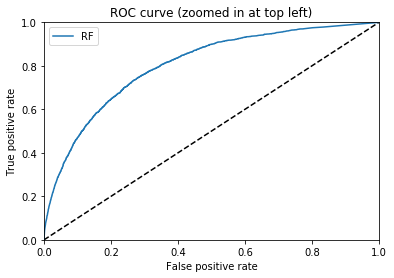

In [18]:
# plot ROC curve
plt.xlim(0, 1)
plt.ylim(0.0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [19]:
n_estimator=100
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator, n_jobs=-1, verbose=1)
kf = cross_validation.KFold(yall.shape[0], n_folds=4)
for train_index, test_index in kf:
    #print(train_index)
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = ysex[train_index], ysex[test_index]
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_rf)
    print(auc)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.1s finished


0.6223198370658405


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


0.7844909191190228


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


0.7631062712262883


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


0.7525708081212947


试试随机森林映射，将样本分层产出one hot encoding，供Logistic Regression使用。

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [22]:
%%time
rt = RandomTreesEmbedding(max_depth=2, n_estimators=10, random_state=0, n_jobs=-1)
rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_rf)
print(auc)

0.7525708081212947
CPU times: user 10.8 s, sys: 8.57 s, total: 19.4 s
Wall time: 20.1 s


In [33]:
def RFLR(X_train, y_train, X_test, y_test):
    rt = RandomTreesEmbedding(max_depth=2, n_estimators=50, random_state=0, n_jobs=-1)
    rt_lm = LogisticRegression()
    pipeline = make_pipeline(rt, rt_lm)
    pipeline.fit(X_train, y_train)
    y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_rt)
    print(auc)

In [34]:
%%time
kf = cross_validation.KFold(ysex.shape[0], n_folds=5, shuffle=True)
for train_index, test_index in kf:
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = ysex[train_index], ysex[test_index]
    RFLR(X_train, y_train, X_test, y_test)

0.7281274454649636
0.7310772609377346
0.7223336837599671
0.7298428270705039
0.7070573186415428
CPU times: user 4min 17s, sys: 2min 26s, total: 6min 44s
Wall time: 7min 18s


进行PLS回归，求解x和y的分解，分解后的因子作为特征输入。

In [13]:
%%time
pls2 = PLSRegression(n_components=7)
pls2.fit(x1, y1)

CPU times: user 2min, sys: 1min 31s, total: 3min 32s
Wall time: 3min 18s


In [14]:
%%time
x0_r, y0_r = pls2.transform(x1, y1)
print(x0_r.shape)

(2267657, 7)
CPU times: user 6.91 s, sys: 11 s, total: 18 s
Wall time: 19.6 s


In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
%%time
svd=TruncatedSVD(n_components=50)
svd.fit(x1) 
u = svd.transform(x1)

CPU times: user 1min 16s, sys: 47.3 s, total: 2min 3s
Wall time: 1min 46s


In [19]:
for i in range(7):
    print(np.corrcoef(y1.iloc[:, 1].T, x0_r[:, i].T)[0, 1])

0.6496398721740004
0.2132827532195946
0.09340869302925237
-0.15741484291634114
0.04550248732429194
-0.008242077180567483
0.03414483704741123


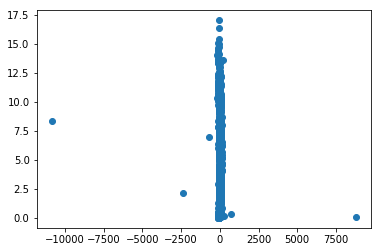

In [40]:
idx = np.random.choice(x0_r.shape[0], 1000)
plt.scatter(y0_r[idx, 5], y1.iloc[idx, 1])